### 1. Problem Statement : 
- Predict the species of iris flower by using the Logistic Regression algo

### 2. Importing Libraries and Dataset

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = sns.load_dataset('iris')

In [55]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3. EDA

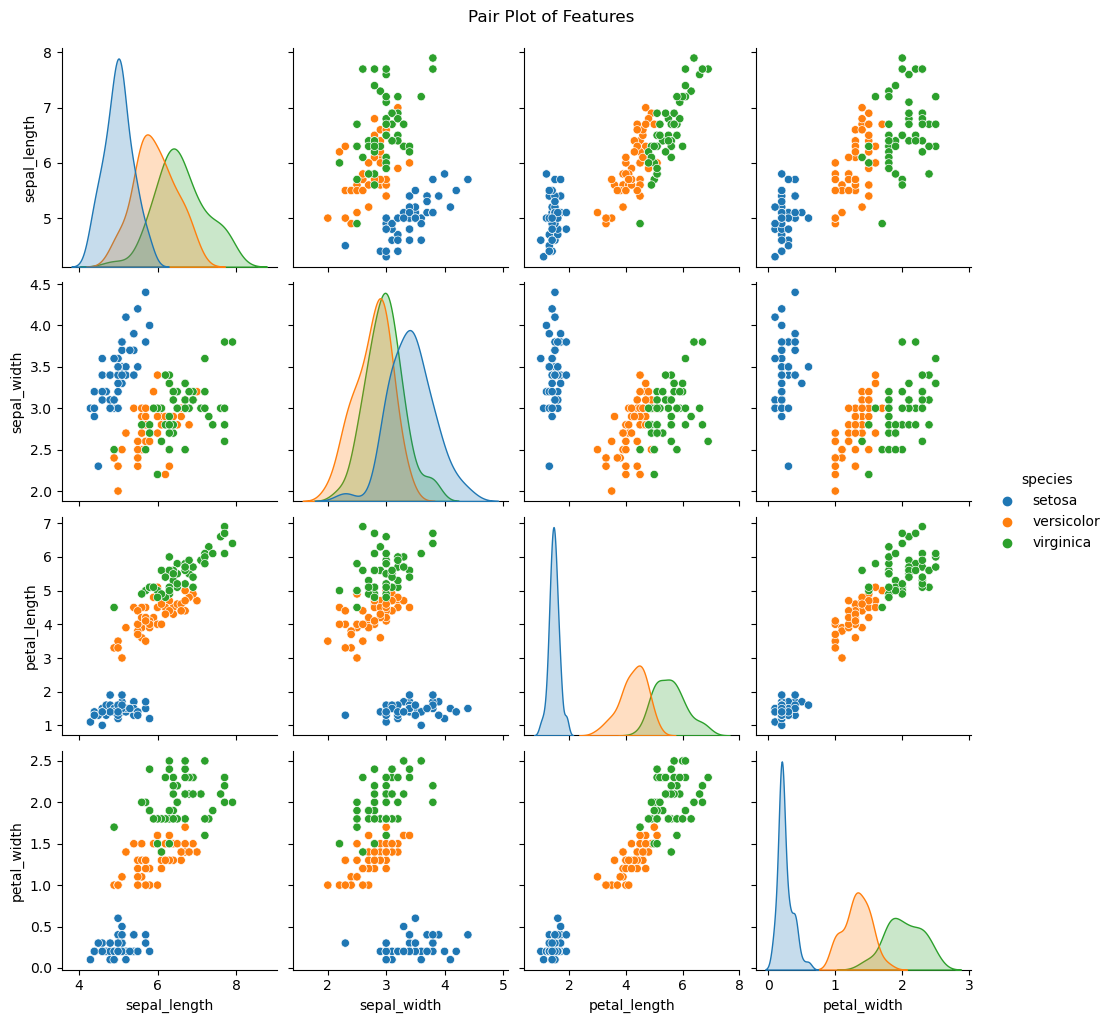

In [56]:
sns.pairplot(data, hue='species')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

### 4. Feature Engineering

In [57]:
data = data[data['species']!='setosa']

In [58]:
data['species'] = data['species'].astype('category')
data['species'] = data['species'].cat.codes

In [52]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000,0.500000
std,0.662834,0.332751,0.825578,0.424769,0.502519
min,4.900000,2.000000,3.000000,1.000000,0.000000
25%,5.800000,2.700000,4.375000,1.300000,0.000000
50%,6.300000,2.900000,4.900000,1.600000,0.500000
75%,6.700000,3.025000,5.525000,2.000000,1.000000
max,7.900000,3.800000,6.900000,2.500000,1.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 4.0 KB


In [61]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 5. Splitting data

In [62]:
x = data.drop('species',axis=1)

In [63]:
x

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
y = data[['species']]

In [65]:
y

,species
50,0
51,0
52,0
53,0
54,0
...,...
145,1
146,1
147,1
148,1


### 6. Training and Testing data

In [66]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42,test_size=0.25)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### 7. HyperParameter Tunning using GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,10,20,30,40,50],'max_iter':[100,200,300]}

In [70]:
logistic_model = GridSearchCV(model,param_grid=parameter,scoring='accuracy',cv=5)

In [71]:
import warnings
warnings.filterwarnings('ignore')
logistic_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [72]:
logistic_model.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [73]:
logistic_model.best_score_

0.9733333333333334

### Accuracy

In [38]:
from sklearn.metrics import accuracy_score

In [36]:
y_pred = logistic_model.predict(x_test)

In [39]:
accuracy_score(y_pred,y_test)

0.92